In [253]:
#Author: Wesley Kirui
#Objective: Use real world data for machine learning
#Data used here is from Inside Airbnb project (http://insideairbnb.com/get-the-data.html)
#Motivation: https://www.kaggle.com/brittabettendorf/berlin-airbnb-data/activity
# Analyze the airbnb house listings in Berlin

#Load modules
import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
%matplotlib inline

#load dataset
DATA_PATH = "datasets"
def load_housing_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path,"listings.csv")
    return pd.read_csv(csv_path)
def load_neighborhood_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path,"neighbourhoods.csv")
    return pd.read_csv(csv_path)
def load_reviews_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path,"reviews.csv")
    return pd.read_csv(csv_path)
def load_geo_data(data_path=DATA_PATH):
    geo_path = os.path.join(data_path,"neighbourhoods.geojson")
    return gpd.read_file(geo_path)

listings = load_housing_data()
neighbourhoods = load_neighborhood_data()
reviews = load_reviews_data()
geo_data = load_geo_data()

In [119]:
#cmap=plt.m.viridis
#f,ax=plt.subplots(1)
#geo_data.plot(ax=ax,figsize=(14,10),categorical=True,legend=True)
#geo_data.plot(geo_data['neighbourhood_group'])
#ax = geo_data.plot()
#for item,row in geo_data.iterrows():
#    plt.annotate(s=row['neighbourhood'],xy=row['neighbourhood_group'], horizontalalignment='center')
#geo_data.apply(lambda x: ax.annotate(s=x.neighbourhood_group, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);
geo_data.shapeRecords

AttributeError: 'GeoDataFrame' object has no attribute 'shapeRecords'

In [124]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [127]:
geo_data1 = gpd.GeoDataFrame(geo_data)
#geo_data1.plot(hue=geo_data1['neighbourhood_group'],figsize=(12,8))
geo_data1.shape

(140, 3)

In [16]:
geo_data1['neighbourhood_group'].unique()

array(['Pankow', 'Charlottenburg-Wilm.', 'Treptow - Köpenick',
       'Marzahn - Hellersdorf', 'Reinickendorf',
       'Friedrichshain-Kreuzberg', None, 'Mitte', 'Spandau',
       'Steglitz - Zehlendorf', 'Tempelhof - Schöneberg', 'Lichtenberg',
       'Neukölln'], dtype=object)

In [17]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23536 entries, 0 to 23535
Data columns (total 16 columns):
id                                23536 non-null int64
name                              23482 non-null object
host_id                           23536 non-null int64
host_name                         23515 non-null object
neighbourhood_group               23536 non-null object
neighbourhood                     23536 non-null object
latitude                          23536 non-null float64
longitude                         23536 non-null float64
room_type                         23536 non-null object
price                             23536 non-null int64
minimum_nights                    23536 non-null int64
number_of_reviews                 23536 non-null int64
last_review                       19380 non-null object
reviews_per_month                 19380 non-null float64
calculated_host_listings_count    23536 non-null int64
availability_365                  23536 non-null int64

In [18]:
listings.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.353600e+04,2.353600e+04,23536.000000,23536.000000,23536.000000,23536.000000,23536.000000,19380.000000,23536.000000,23536.000000
mean,1.778264e+07,6.172301e+07,52.509906,13.406193,69.612424,6.897774,19.238826,1.068531,2.101971,68.692046
std,9.887995e+06,6.782382e+07,0.031279,0.058574,216.660408,24.879032,40.360483,1.497605,4.331873,107.718445
min,2.695000e+03,1.581000e+03,52.345800,13.097180,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.056046e+06,9.819079e+06,52.489178,13.375730,32.000000,2.000000,1.000000,0.150000,1.000000,0.000000
50%,1.874818e+07,3.424883e+07,52.509210,13.416575,49.000000,3.000000,5.000000,0.480000,1.000000,1.000000
75%,2.587987e+07,9.412761e+07,52.532670,13.439533,75.000000,4.000000,17.000000,1.370000,1.000000,106.000000
max,3.468232e+07,2.616142e+08,52.651670,13.757640,9000.000000,1000.000000,545.000000,46.040000,49.000000,365.000000


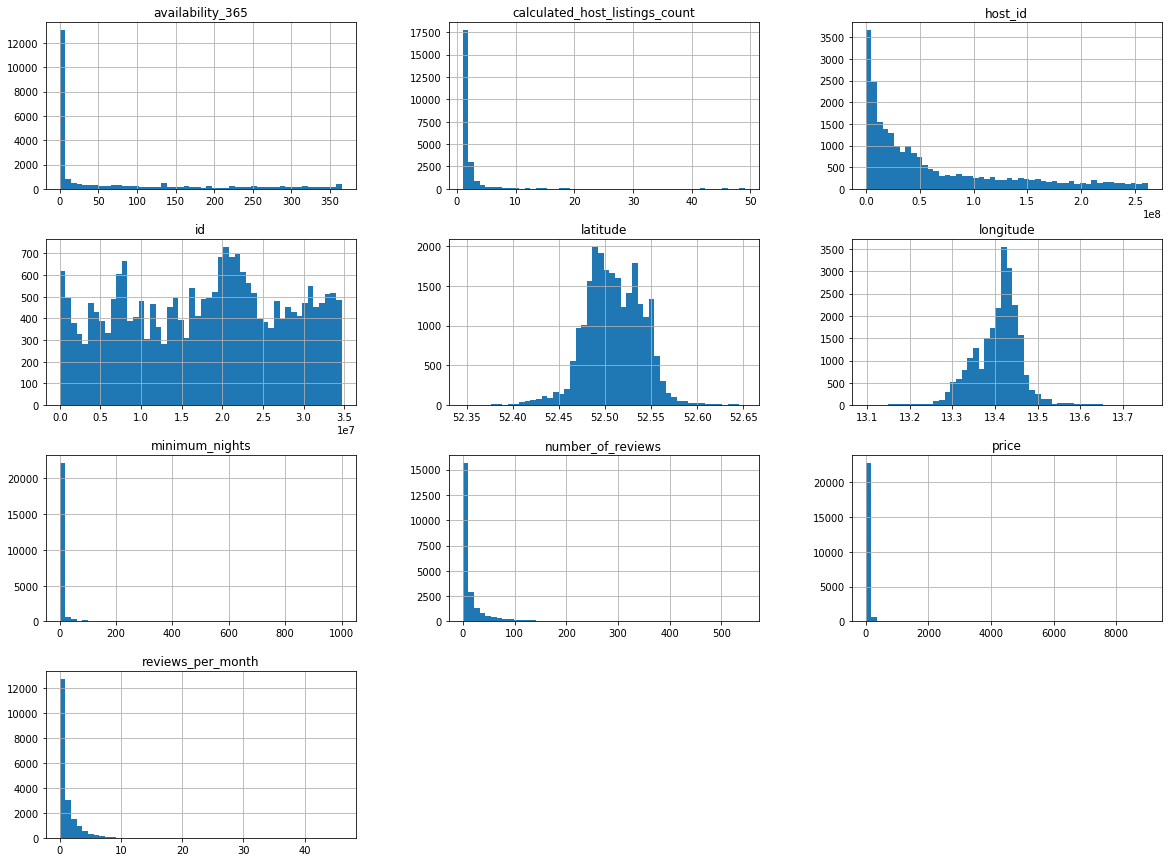

In [19]:
listings.hist(bins=50,figsize=(20,15))
plt.show()

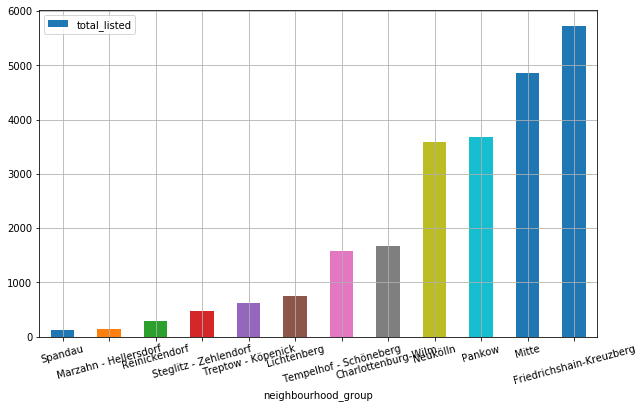

In [87]:
#summary by neighborhood
neighbourhood_summary = listings.groupby('neighbourhood_group')['host_id'].count().sort_values()
neighbourhood_summary = pd.DataFrame(neighbourhood_summary)
neighbourhood_summary.columns =['total_listed']
neighbourhood_summary= neighbourhood_summary.reset_index()
neighbourhood_summary.plot.bar(x='neighbourhood_group',y='total_listed',
                               figsize=(10,6),rot=15,grid=True)

In [65]:
neighbourhood_summary

,neighbourhood_group,total_listed
0,Spandau,129
1,Marzahn - Hellersdorf,147
2,Reinickendorf,296
3,Steglitz - Zehlendorf,468
4,Treptow - Köpenick,626
5,Lichtenberg,743
6,Tempelhof - Schöneberg,1586
7,Charlottenburg-Wilm.,1676
8,Neukölln,3587
9,Pankow,3687


In [238]:
#analysis on the prices
#which factors strongly affect the price range --reviews?
#split the data into train & test split
#remove outliers: where price is greater than 500
listings1 = listings[listings['price']<=500]
listings1 = listings[listings['minimum_nights']<=365]
def split_train_test(data, test_ratio):
    shuffle_index = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffle_index[:test_set_size]
    train_indices = shuffle_index[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

#split the listings into train and test set (20% test ratio)
#print the new split sizes
train_set, test_set = train_test_split(listings1, 0.2)
print("Data split into:",len(train_set),"train set +",len(test_set),"test set")


Data split into: 18823 train set + 4705 test set


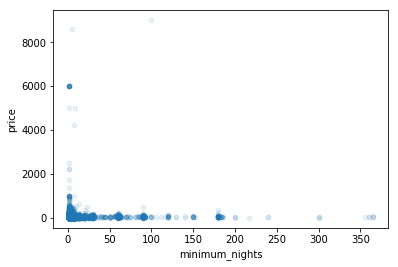

In [239]:
listings1 = train_set.copy()#listings[listings['price']<=500]
#listings1 = listings1[listings1['minimum_nights']<=365]

listings1.plot(kind='scatter',x='minimum_nights',y='price',alpha=0.1)

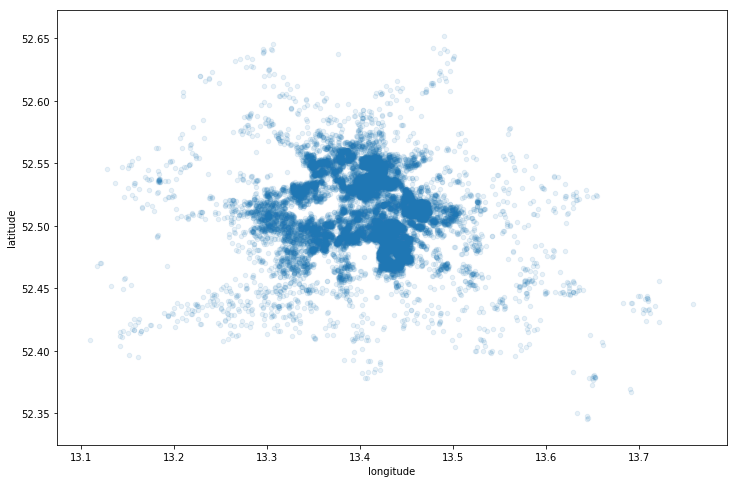

In [240]:
#explore the data
#distribution
listings1.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1,figsize=(12,8))

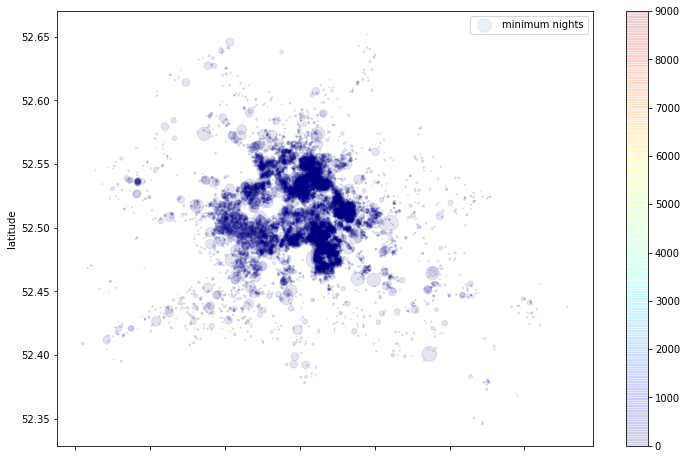

In [241]:
#Is there a particular distribution pattern between price and location?
listings1.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1,figsize=(12,8),
              s=listings1['minimum_nights'],label='minimum nights',
              c=listings1['price'],cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend()

In [242]:
#correlation analysis between variables
corr_matrix = listings1.corr()
corr_matrix['price'].sort_values(ascending= False)

price                             1.000000
availability_365                  0.123690
calculated_host_listings_count    0.074354
host_id                           0.033700
id                                0.029605
reviews_per_month                 0.015814
latitude                          0.005653
number_of_reviews                -0.000509
minimum_nights                   -0.000992
longitude                        -0.035572
Name: price, dtype: float64

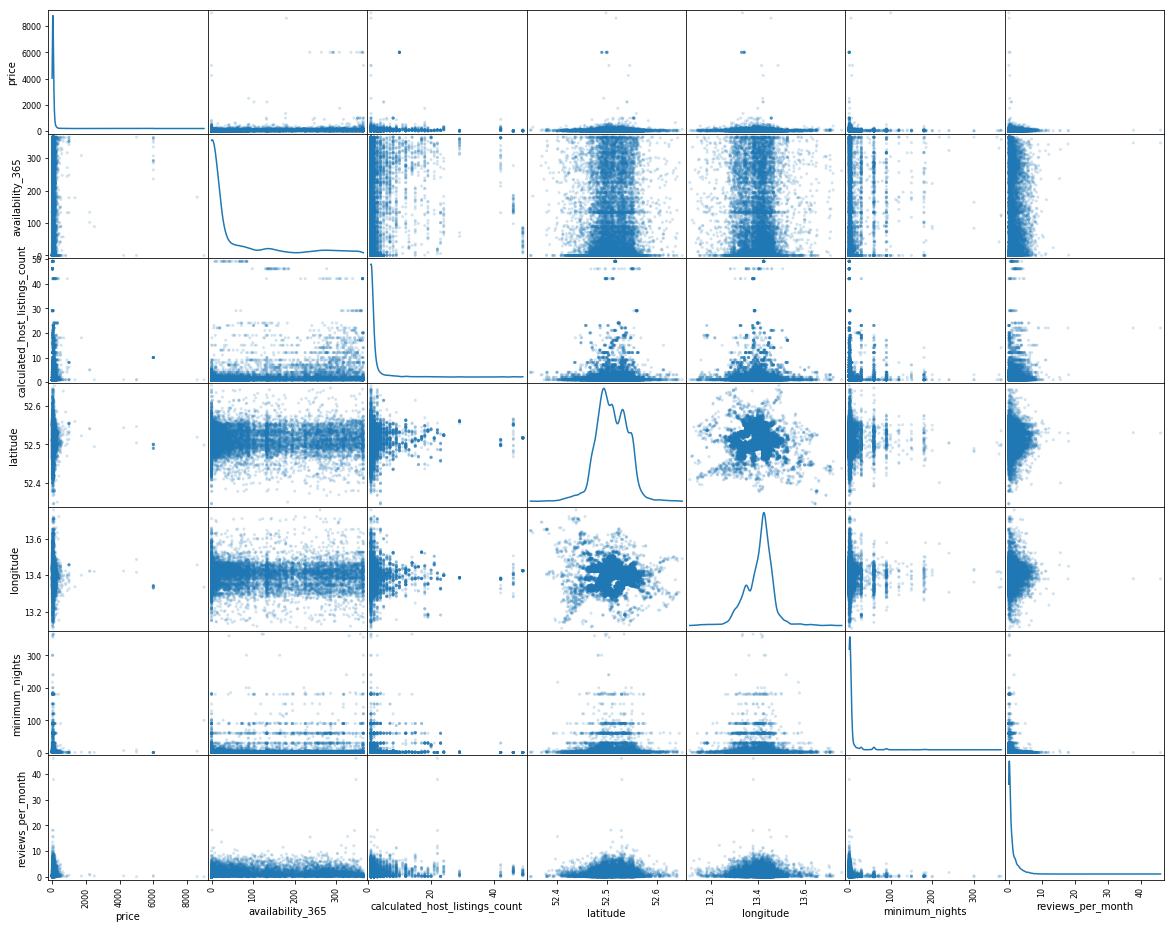

In [243]:
#plot the correlation matrix
use_attributes =['price','availability_365','calculated_host_listings_count',
                'latitude','longitude','minimum_nights','reviews_per_month']
pd.plotting.scatter_matrix(listings1[use_attributes],alpha=0.2,figsize=(20,16),diagonal='kde')
plt.show()

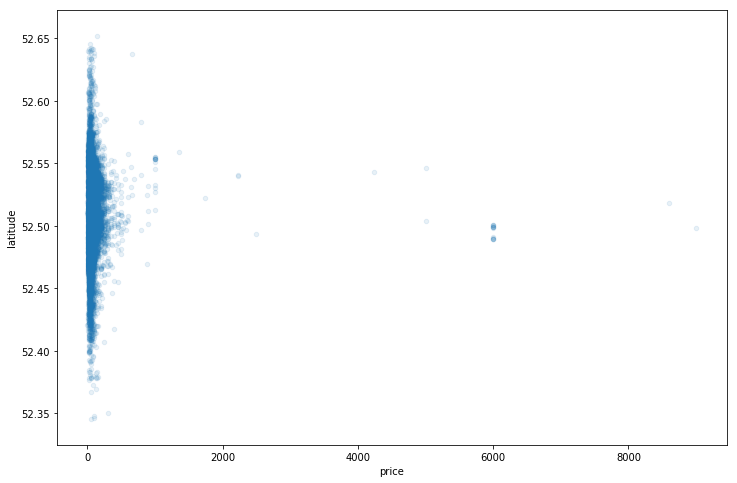

In [244]:
# look closely the relationship between price & latitude
listings1.plot(kind='scatter',x='price',y='latitude',alpha=0.1,figsize=(12,8))
plt.show()

In [245]:
listings1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18823 entries, 21304 to 21488
Data columns (total 16 columns):
id                                18823 non-null int64
name                              18778 non-null object
host_id                           18823 non-null int64
host_name                         18809 non-null object
neighbourhood_group               18823 non-null object
neighbourhood                     18823 non-null object
latitude                          18823 non-null float64
longitude                         18823 non-null float64
room_type                         18823 non-null object
price                             18823 non-null int64
minimum_nights                    18823 non-null int64
number_of_reviews                 18823 non-null int64
last_review                       15486 non-null object
reviews_per_month                 15486 non-null float64
calculated_host_listings_count    18823 non-null int64
availability_365                  18823 non-null i

In [285]:
#replace missing values in the dataset
#remove the object values in the dataset
#listings1_data = listings1
listings1_data = train_set.drop('price',axis=1)
listings1_labels = train_set['price'].copy()
listings1_data = listings1_data.drop(['name','host_name','neighbourhood_group','neighbourhood',
                                    'room_type','last_review'],axis=1)
#define impute function to replace na values with the median
imputer = SimpleImputer(strategy='median')
imputer.fit(listings1_data)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [247]:
imputer.statistics_

array([1.8766131e+07, 3.4006291e+07, 5.2509320e+01, 1.3416670e+01,
       3.0000000e+00, 5.0000000e+00, 4.8000000e-01, 1.0000000e+00,
       1.0000000e+00])

In [248]:
listings1_data.median().values

array([1.8766131e+07, 3.4006291e+07, 5.2509320e+01, 1.3416670e+01,
       3.0000000e+00, 5.0000000e+00, 4.8000000e-01, 1.0000000e+00,
       1.0000000e+00])

In [249]:
#transform the data using the imputed values
X=imputer.transform(listings1_data)
#convert data back to dataframe
listings_tr = pd.DataFrame(X,columns=listings1_data.columns)

In [250]:
listings_tr.head()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,31527915.0,77905707.0,52.51562,13.31240,2.0,1.0,0.44,1.0,286.0
1,31063190.0,5891250.0,52.53402,13.39662,30.0,0.0,0.48,3.0,317.0
2,24767430.0,125567862.0,52.52810,13.33352,2.0,1.0,0.13,1.0,294.0
3,6150886.0,31907271.0,52.57594,13.35310,1.0,1.0,0.02,2.0,0.0
4,33412179.0,24509717.0,52.52129,13.45481,3.0,0.0,0.48,1.0,133.0


In [251]:
#use label econder to transform object data
#Encode room type
encoder = LabelEncoder()
listings1_type = listings1['room_type']
listings1_type_encoded = encoder.fit_transform(listings1_type)
listings1_type_encoded
#listings1.head()
#print(encoder.classes_)

array([1, 0, 1, ..., 0, 1, 0])

In [267]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names=attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [282]:
#data transformation
#define data transformation pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
#from sklearn.features.transformers import DataFrameSelector
#from sklearn.features.transformers import CombinedAttributesAdder
from sklearn.pipeline import FeatureUnion

num_attribs = list(listings1_data)
cat_attribs = ['room_type']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    #('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', LabelBinarizer()),
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    #("cat_pipeline", cat_pipeline),
])

In [286]:
#full data pipeline transformation
listings1_prepared = full_pipeline.fit_transform(listings1_data)
listings1_prepared

array([[ 1.39271344,  0.24038607,  0.17792379, ..., -0.37568417,
        -0.25579828,  2.01749199],
       [ 1.34563677, -0.82040041,  0.76720257, ..., -0.34688108,
         0.20617256,  2.30543183],
       [ 0.70787589,  0.94245857,  0.57760853, ..., -0.59890807,
        -0.25579828,  2.09179905],
       ...,
       [ 1.37685806,  2.55338584,  0.0965777 , ..., -0.12365717,
        -0.25579828,  2.30543183],
       [-0.59986497, -0.83264369, -0.09365686, ..., -0.03004714,
        -0.25579828,  0.1226621 ],
       [ 1.42503008,  2.58290194,  1.39907595, ..., -0.34688108,
         1.36109966,  2.66767872]])

In [287]:
#train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(listings1_prepared,listings1_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [292]:
#test the model in the data
trial_data = listings1_data.iloc[:5]
trial_data_prepared = full_pipeline.fit_transform(trial_data)
trial_labels = listings1_labels.iloc[:5]

#print predictions using the linear model
print("Predictions:\t", lin_reg.predict(trial_data_prepared))

Predictions:	 [75.31632345 95.52844058 95.6340099  33.71069637 43.96289648]


In [291]:
print("Labels:\t\t", list(trial_labels))

Labels:		 [84, 170, 45, 36, 40]


In [296]:
#measure mean squared errors
from sklearn.metrics import mean_squared_error
listings_predictions = lin_reg.predict(listings1_prepared)
lin_mse = mean_squared_error(listings1_labels, listings_predictions)
lin_mse = np.sqrt(lin_mse)
lin_mse

207.96542704347465

In [299]:
#use decission tree regressor
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(listings1_prepared, listings1_labels)

#evaluate the training set
listings_predictions1 = tree_reg.predict(listings1_prepared)
tree_mse = mean_squared_error(listings1_labels, listings_predictions1)
tree_mse = np.sqrt(tree_mse)
tree_mse

0.0

In [300]:
tree_reg.predict(trial_data_prepared)

array([40., 55., 69., 20., 25.])

In [302]:
list(trial_labels)

[84, 170, 45, 36, 40]